## BUSINESS PROBLEM 
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create


## BUSINESS SOLUTION  
By analyzing domestic profit, worldwide profit, and production profit ratios, the new movie studio can identify which films offer the best returns on investment. These insights help guide decisions on budgeting, genre selection, and marketing strategy, enabling the company to focus on producing movies that maximize profitability and audience appeal.


## Get started 


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


## Data Analysis  

### Objectives  
1: Load the three datasets 




In [96]:
df1 = pd.read_csv('Data\cleaned_movie_budgets.csv')
df1.head()


,release_date,title,production_budget,domestic_gross,worldwide_gross,year
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [97]:
df2 = pd.read_csv('Data\cleaned_bom_movie_gross.csv')
df2.head()

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000.0
1,Alice in Wonderland (2010),334200000.0,691300000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0
3,Inception,292600000.0,535700000.0
4,Shrek Forever After,238700000.0,513900000.0


In [98]:
df3 = pd.read_csv('Data/tmdb.movies.csv')
df3.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Statistics of each dataset  

In [99]:
df1.describe()

,production_budget,domestic_gross,worldwide_gross,year
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139
std,4.181208e+07,6.824060e+07,1.747200e+08,12.724386
min,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000
50%,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000
75%,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000
max,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000


In [100]:
df2.describe()

,domestic_gross,foreign_gross
count,3.359000e+03,2.037000e+03
mean,2.874585e+07,7.487281e+07
std,6.698250e+07,1.374106e+08
min,1.000000e+02,6.000000e+02
25%,1.200000e+05,3.700000e+06
50%,1.400000e+06,1.870000e+07
75%,2.790000e+07,7.490000e+07
max,9.367000e+08,9.605000e+08


In [101]:
df3.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## Finding the relationships


In [102]:
# finding correlations between datasets
## Finding the relationships
merged_df1_df3 = pd.merge(df1, df3, left_on='title', right_on='title', how='inner')
merged_df1_df3 


,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2015-09-01,Exeter,25000.0,0.0,4.897920e+05,2015,14678,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,4.7,121
2381,2015-04-21,Ten,25000.0,0.0,0.000000e+00,2015,12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,5.4,5
2382,2014-12-31,Dry Spell,22000.0,0.0,0.000000e+00,2014,10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,6.0,1
2383,2013-01-04,All Superheroes Must Die,20000.0,0.0,0.000000e+00,2013,8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,3.9,19


In [103]:
# creat a new 
domestic_profit = merged_df1_df3['domestic_gross'] - merged_df1_df3['production_budget']
merged_df1_df3['domestic_profit'] = domestic_profit
merged_df1_df3.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count,domestic_profit
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676,335507625.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,-169536125.0
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,128405868.0
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,378815482.0
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510,-70975705.0


In [104]:
# worldwide profit
worldwide_profit = merged_df1_df3['worldwide_gross'] - merged_df1_df3['production_budget']
merged_df1_df3['worldwide_profit'] = worldwide_profit
merged_df1_df3.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count,domestic_profit,worldwide_profit
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676,335507625.0,2.351345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,-169536125.0,6.350639e+08
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,128405868.0,1.072414e+09
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,378815482.0,1.748134e+09
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510,-70975705.0,3.559452e+08


In [105]:
# merging release_date_x and release_date_y into a single column
merged_df1_df3['release_date'] = merged_df1_df3['release_date_x'].combine_first(merged_df1_df3['release_date_y'])
merged_df1_df3.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count,domestic_profit,worldwide_profit,release_date
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676,335507625.0,2.351345e+09,2009-12-18
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,-169536125.0,6.350639e+08,2011-05-20
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,128405868.0,1.072414e+09,2015-05-01
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,378815482.0,1.748134e+09,2018-04-27
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510,-70975705.0,3.559452e+08,2017-11-17


## Visualizations

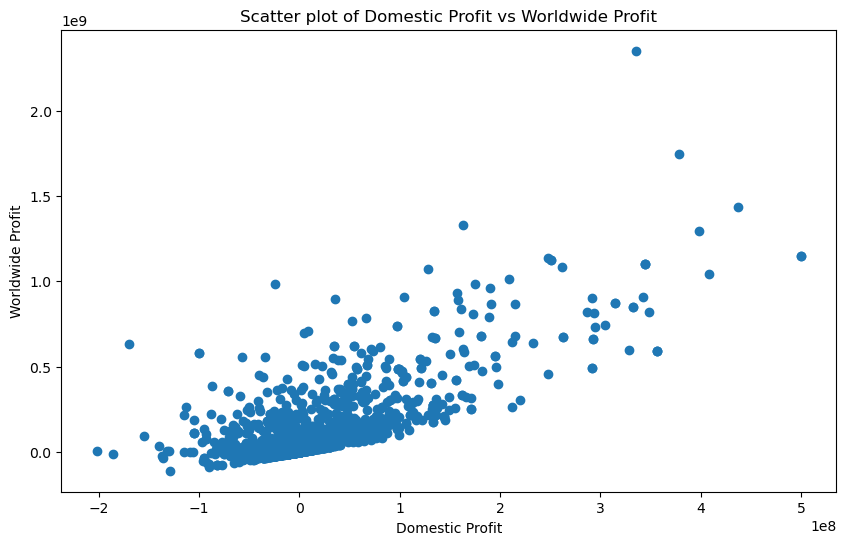

In [108]:
# plot a scatter plot to visualize the relationship between domestic profit and worldwide profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['domestic_profit'], merged_df1_df3['worldwide_profit'])
plt.xlabel('Domestic Profit')
plt.ylabel('Worldwide Profit')
plt.title('Scatter plot of Domestic Profit vs Worldwide Profit')
plt.show()

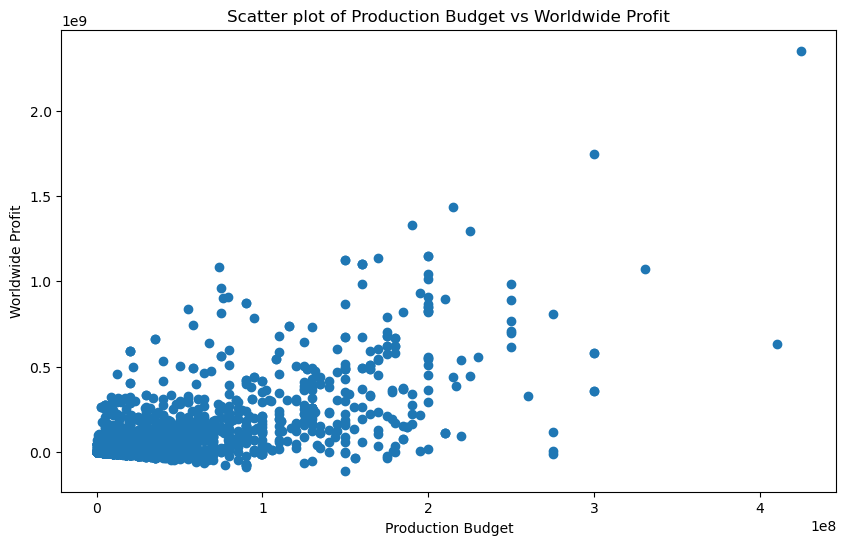

In [109]:
# scatter plot of production budget vs worldwide profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['production_budget'], merged_df1_df3['worldwide_profit'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Profit')
plt.title('Scatter plot of Production Budget vs Worldwide Profit')
plt.show()

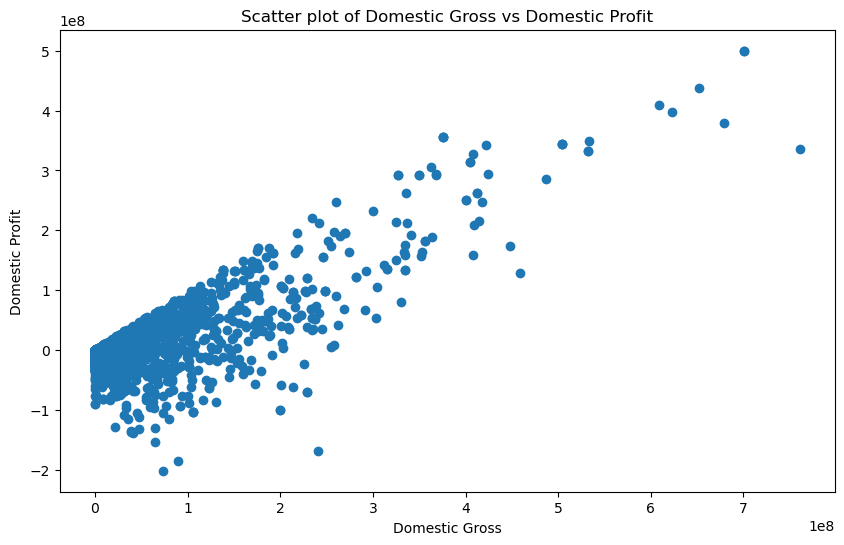

In [110]:
# scatter plot of domestic gross vs domestic profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['domestic_gross'], merged_df1_df3['domestic_profit'])
plt.xlabel('Domestic Gross')
plt.ylabel('Domestic Profit')
plt.title('Scatter plot of Domestic Gross vs Domestic Profit')
plt.show()

C:\Users\FELIX\AppData\Local\Temp\ipykernel_7136\1150159285.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_domestic_gross = merged_df1_df3.groupby('year_range')['domestic_gross'].mean().reset_index()
c:\Users\FELIX\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


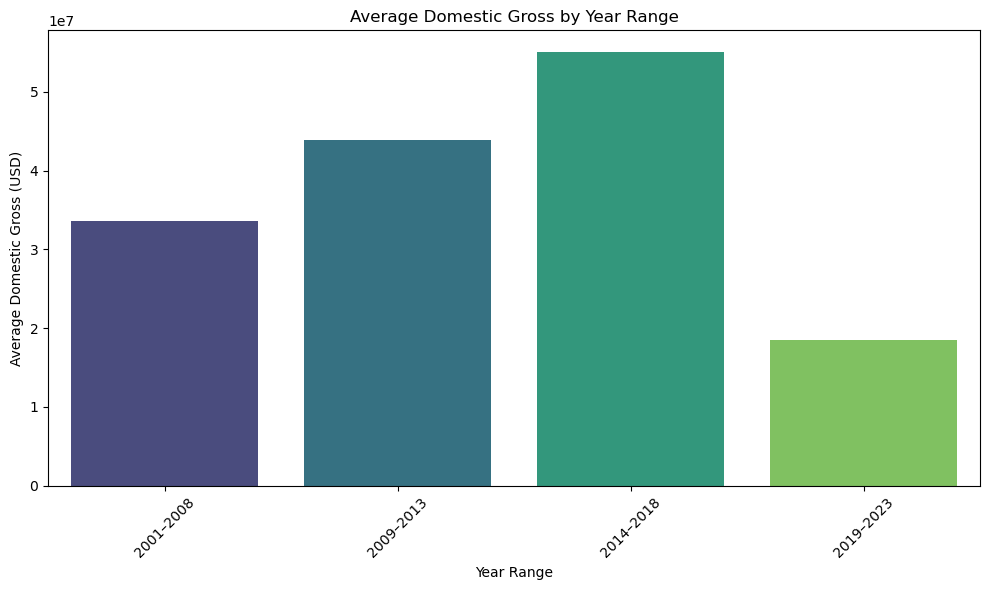

In [128]:
# Define the year ranges (bins)
bins = [2000, 2008, 2013, 2018, 2023]  # adjust as needed
labels = ['2001–2008', '2009–2013', '2014–2018', '2019–2023']

# Create a new column that categorizes each movie into a year range
merged_df1_df3['year_range'] = pd.cut(merged_df1_df3['year'], bins=bins, labels=labels, right=True)

# Group by year_range and calculate the average domestic gross
avg_domestic_gross = merged_df1_df3.groupby('year_range')['domestic_gross'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='year_range', y='domestic_gross', data=avg_domestic_gross, palette='viridis')

plt.title('Average Domestic Gross by Year Range')
plt.xlabel('Year Range')
plt.ylabel('Average Domestic Gross (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

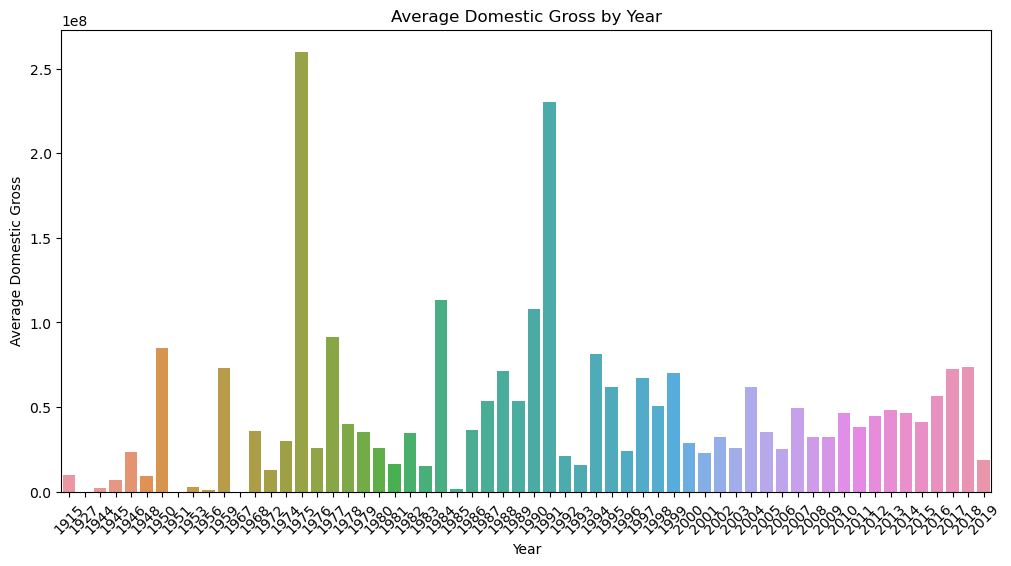

In [127]:
# average domestic gross by year range
merged_df1_df3['release_date'] = pd.to_datetime(merged_df1_df3['release_date'], errors='coerce')
merged_df1_df3['year'] = merged_df1_df3['release_date'].dt.year
yearly_domestic_gross = merged_df1_df3.groupby('year')['domestic_gross'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_domestic_gross, x='year', y='domestic_gross')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.title('Average Domestic Gross by Year')
plt.xticks(rotation=45)
plt.show()

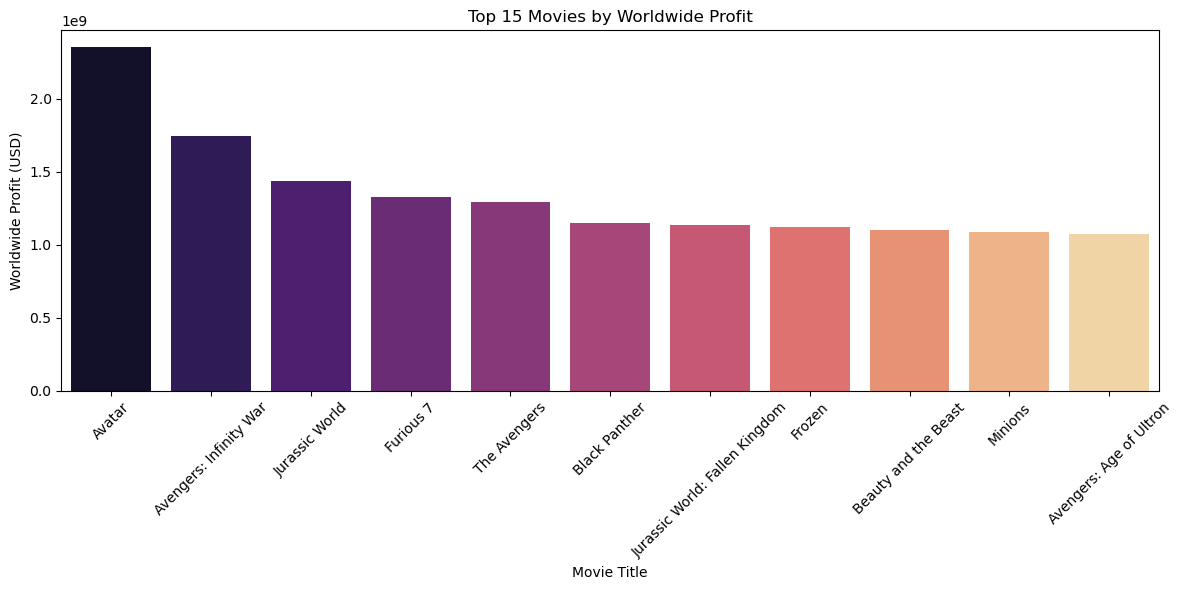

In [130]:
# top 15 movies by worldwide profit
top_15_worldwide_profit = merged_df1_df3.nlargest(15, 'worldwide_profit')[['title', 'worldwide_profit']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_worldwide_profit, x='title', y='worldwide_profit', palette='magma')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Profit (USD)')
plt.title('Top 15 Movies by Worldwide Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

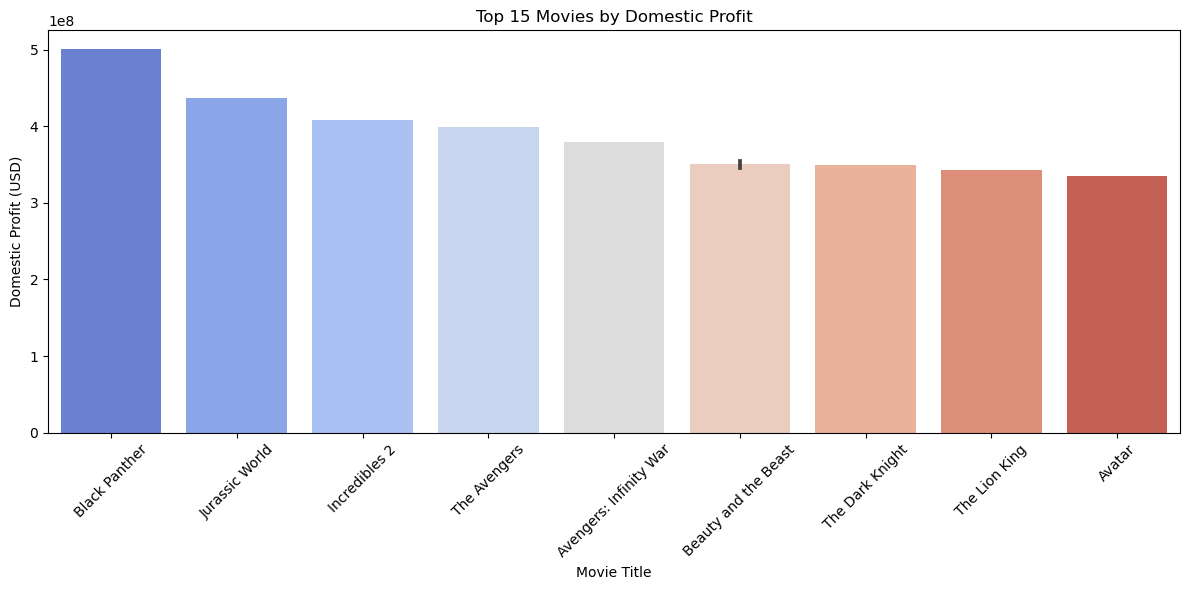

In [134]:
# top 15 movies by domestic profit
top_15_domestic_profit = merged_df1_df3.nlargest(15, 'domestic_profit')[['title', 'domestic_profit']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_domestic_profit, x='title', y='domestic_profit', palette='coolwarm')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Profit (USD)')
plt.title('Top 15 Movies by Domestic Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

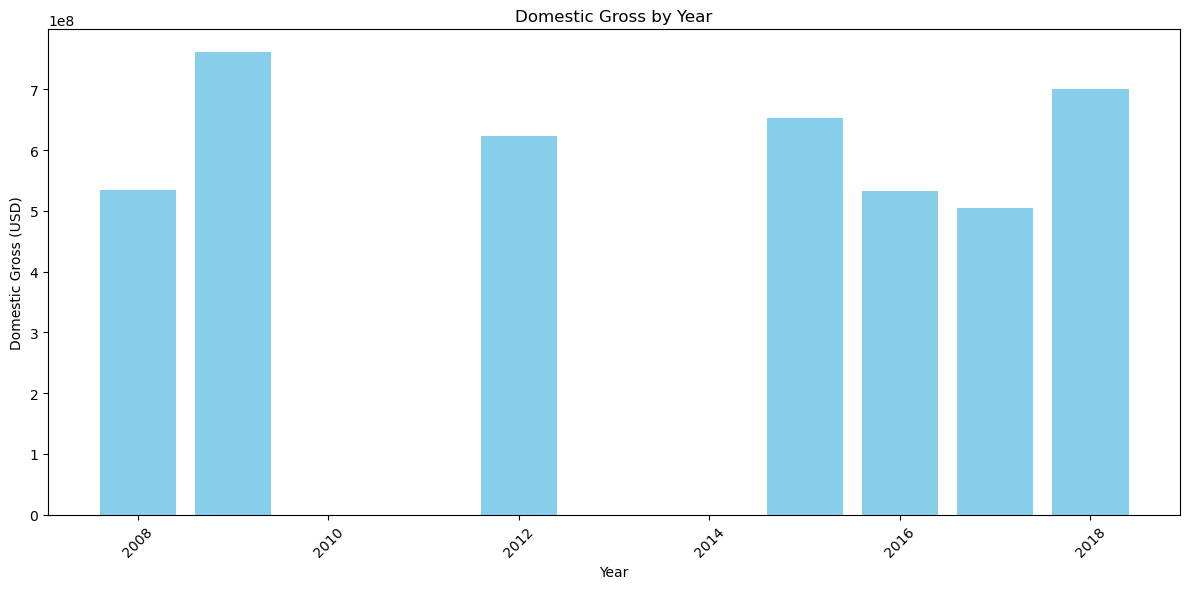

In [133]:
# create a bar plot to visualize the domestic gross and year,top 15
plt.figure(figsize=(12, 6))
top_15 = merged_df1_df3.nlargest(15, 'domestic_gross')
plt.bar(top_15['year'], top_15['domestic_gross'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Domestic Gross (USD)')
plt.title('Domestic Gross by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

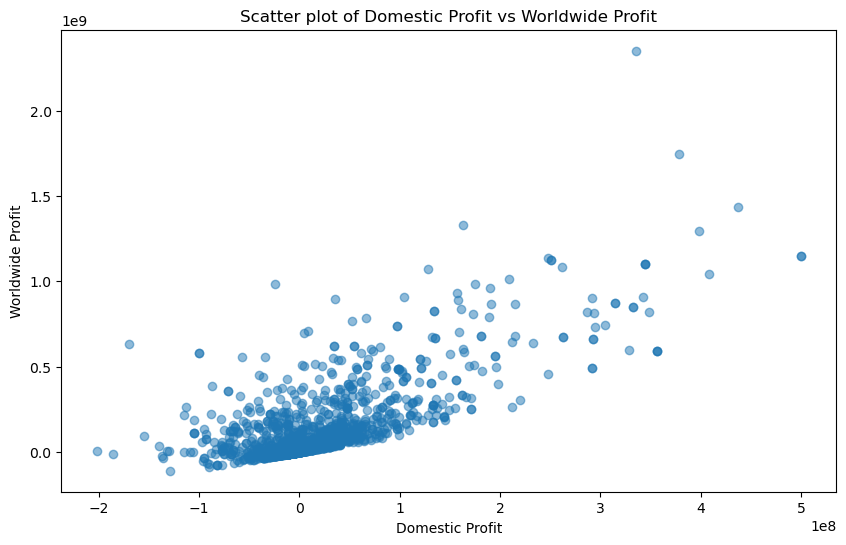

In [135]:
# plot a scatter plot to visualize the relationship between domestic profit and worldwide profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['domestic_profit'], merged_df1_df3['worldwide_profit'], alpha=0.5)
plt.xlabel('Domestic Profit')
plt.ylabel('Worldwide Profit')
plt.title('Scatter plot of Domestic Profit vs Worldwide Profit')
plt.show()

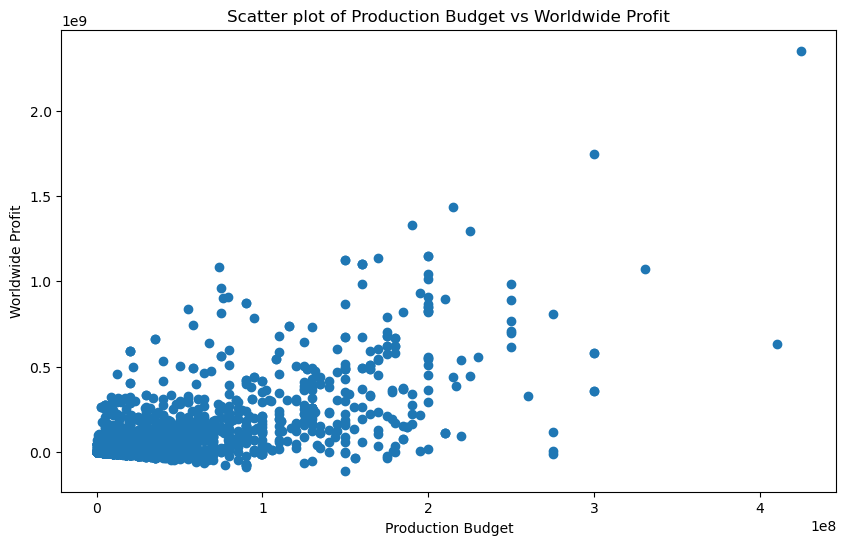

In [136]:
# scatter plot of production budget vs worldwide profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['production_budget'], merged_df1_df3['worldwide_profit'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Profit')
plt.title('Scatter plot of Production Budget vs Worldwide Profit')
plt.show()

#### Based on the plot shown above , it shows that whenever the production budget increases there is also an increase in profits world wide.Successful films usually have moderate to high production budgets that translate into high worldwide profits. However, spending a lot doesn’t guarantee success—efficient use of the budget and global appeal are key to making strong profits.

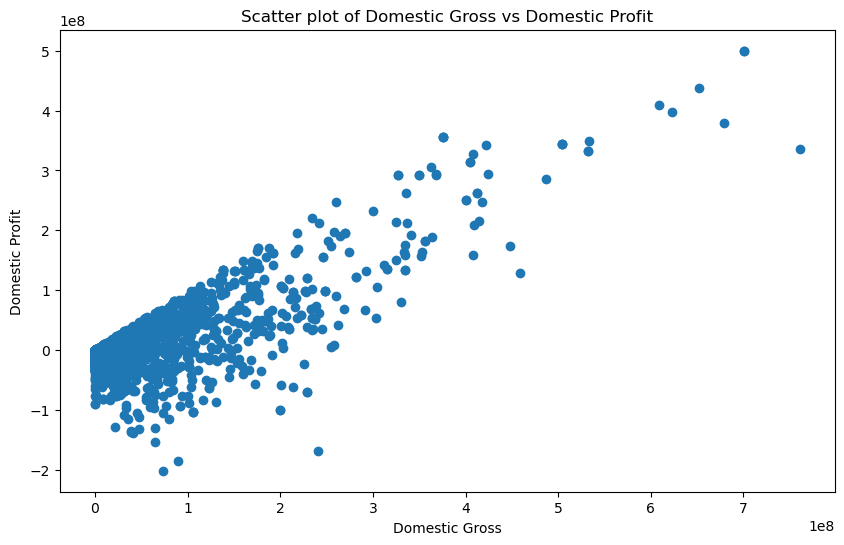

In [137]:
# scatter plot of domestic gross vs domestic profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['domestic_gross'], merged_df1_df3['domestic_profit'])
plt.xlabel('Domestic Gross')
plt.ylabel('Domestic Profit')
plt.title('Scatter plot of Domestic Gross vs Domestic Profit')
plt.show()

### This scatter plot shows the correlation bettwen two domestic and worldwide profits

#### There’s a *strong positive correlation* between *Domestic Profit* and *Worldwide Profit* — movies that earn more domestically usually also earn more worldwide. A few outliers show that some films with weak domestic profits can still succeed globally.

C:\Users\FELIX\AppData\Local\Temp\ipykernel_7136\1150159285.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_domestic_gross = merged_df1_df3.groupby('year_range')['domestic_gross'].mean().reset_index()
c:\Users\FELIX\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


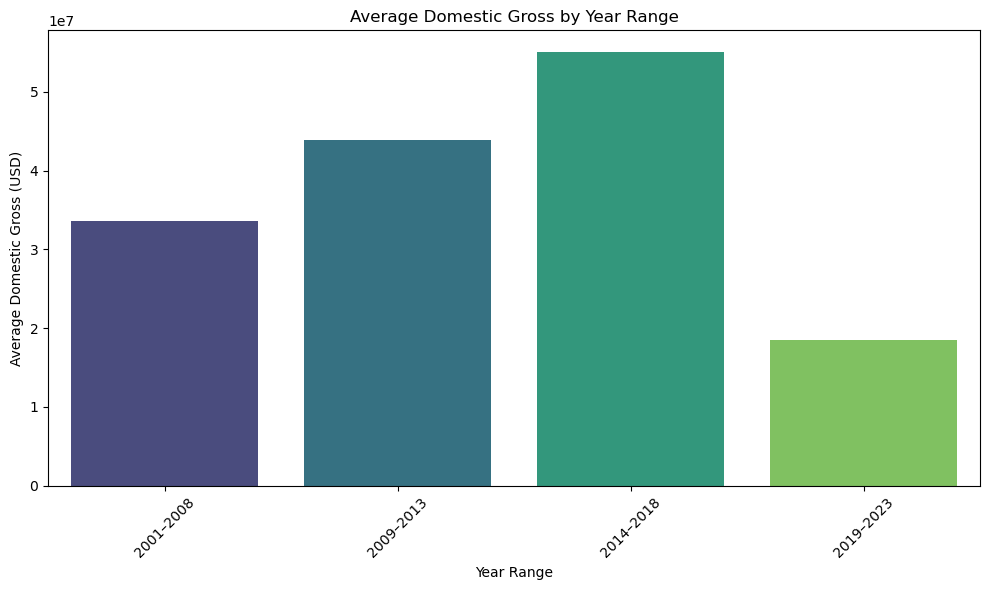

In [138]:
# Define the year ranges (bins)
bins = [2000, 2008, 2013, 2018, 2023]  # adjust as needed
labels = ['2001–2008', '2009–2013', '2014–2018', '2019–2023']

# Create a new column that categorizes each movie into a year range
merged_df1_df3['year_range'] = pd.cut(merged_df1_df3['year'], bins=bins, labels=labels, right=True)

# Group by year_range and calculate the average domestic gross
avg_domestic_gross = merged_df1_df3.groupby('year_range')['domestic_gross'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='year_range', y='domestic_gross', data=avg_domestic_gross, palette='viridis')

plt.title('Average Domestic Gross by Year Range')
plt.xlabel('Year Range')
plt.ylabel('Average Domestic Gross (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\FELIX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


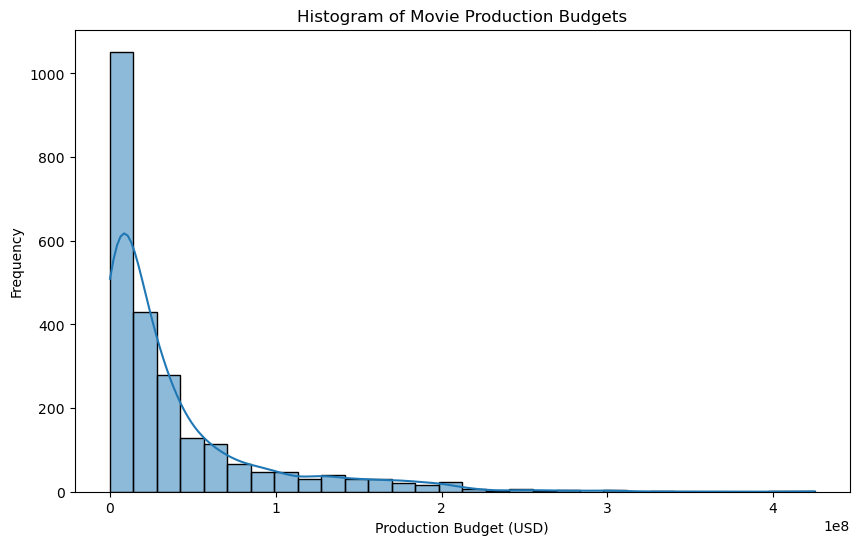

In [139]:
# create a histogram of production budgets
plt.figure(figsize=(10, 6))
sns.histplot(merged_df1_df3['production_budget'], bins=30, kde=True)
plt.title('Histogram of Movie Production Budgets')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Frequency')
plt.show()